In [1]:
from sklearn import tree
import graphviz 
import pydotplus
import pandas as pd
import numpy as np

In [2]:
#create decision tree model
dtc_model = tree.DecisionTreeClassifier()

#load data
data_df = pd.read_csv("../db/stock_data_with_perf_fixed.csv")
data_df.head()

C:\Users\rpaul\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,name,ticker,Quarter end,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,Current Liabilities,...,two_quarter_return,one_year_return,two_year_return,three_year_return,four_year_return,five_year_return,seven_year_return,ten_year_return,twelve_year_return,fifteen_year_return
0,NaN,CRA,2011-03-26,82181869,82181869,1,607664000,364389000,44109000,29630000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,CRA,2010-12-25,82113206,82113206,1,612278000,365667000,44805000,30514000,...,-3.516174,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,CRA,2010-09-25,82078098,82078098,1,617005000,359707000,41036000,26951000,...,2.384501,9.138187,-47.185081,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,CRA,2010-06-26,81987689,81987689,1,625593000,366249000,44013000,30068000,...,13.551402,-0.512164,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,CRA,2010-03-27,81987689,81987689,1,625022000,363068000,39415000,25625000,...,3.491828,-8.900836,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data_df.columns

Index(['name', 'ticker', 'Quarter end', 'Shares', 'Shares split adjusted',
       'Split factor', 'Assets', 'Current Assets', 'Liabilities',
       'Current Liabilities', 'Shareholders equity',
       'Non-controlling interest', 'Preferred equity',
       'Goodwill & intangibles', 'Long-term debt', 'Revenue', 'Earnings',
       'Earnings available for common stockholders', 'EPS basic',
       'EPS diluted', 'Dividend per share', 'Cash from operating activities',
       'Cash from investing activities', 'Cash from financing activities',
       'Cash change during period', 'Cash at end of period',
       'Capital expenditures', 'Price', 'Price high', 'Price low', 'ROE',
       'ROA', 'Book value of equity per share', 'P/B ratio', 'P/E ratio',
       'Cumulative dividends per share', 'Dividend payout ratio',
       'Long-term debt to equity ratio', 'Equity to assets ratio',
       'Net margin', 'Asset turnover', 'Free cash flow per share',
       'Current ratio', 'mktcap_revenue_value', '

In [4]:
"specify the features(measures) and target (label) to be used"

features_columns = ['EPS basic','ROE','ROA', 'P/B ratio', 'P/E ratio', 'Dividend payout ratio',
                   'Long-term debt to equity ratio', 'Equity to assets ratio', 'Free cash flow per share',
                   'Current ratio', 'mktcap_revenue_value', 'mktcap_free_cash_flow_value',
                   'mktcap_cash_value', 'cash_oper_gt_earnings_value',
                   'entvalue_earnings_value', 'marketcap_bookvalue_value']

features_data_df = data_df[features_columns]
data = features_data_df.values
data


array([[-0.06      , -0.0305    , -0.0283    , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02      , -0.0426    , -0.0397    , ...,  3.11435523,
         0.        ,  0.89290883],
       [-0.1       , -0.1669    , -0.1556    , ...,  0.        ,
         0.        ,  0.95299145],
       ...,
       [ 0.67      ,  0.        ,  0.        , ...,  1.90730337,
         0.        ,  0.        ],
       [ 0.61      ,  0.        ,  0.        , ...,  1.22623967,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [5]:

target_values = ['no','yes']
selected_target_column = 'quarter_return'

data_df.loc[data_df[selected_target_column] > 0.0, 'Value_stock'] = 1
data_df.loc[data_df[selected_target_column] <= 0.0, 'Value_stock'] = 0
target = data_df['Value_stock'].values
target

array([0., 0., 0., ..., 1., 1., 0.])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [7]:
#fit the model with data
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")


Training data score: 0.9999545071992357
Test data score: 0.5863527806209485


In [12]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 3)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")


Training data score: 0.6638309487523599
Test data score: 0.65827362674855


In [9]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 4)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")

Training data score: 0.6643768623615313
Test data score: 0.6571818491982259


In [10]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 5)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")

Training data score: 0.6660600959898096
Test data score: 0.6567724326168544


In [11]:
#repeat for different depths
dtc_model = tree.DecisionTreeClassifier(max_depth = 2)
dtc_model = dtc_model.fit(X_train, y_train)
print(f"Training data score: {dtc_model.score(X_train, y_train)}")
print(f"Test data score: {dtc_model.score(X_test, y_test)}")

Training data score: 0.6596228646816641
Test data score: 0.6570453770044353


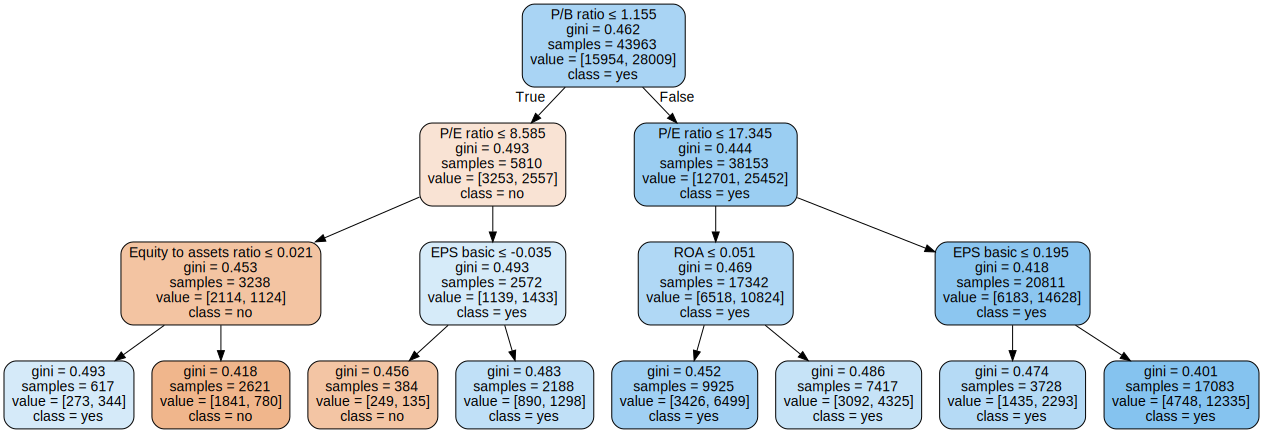

In [13]:
dot_data = tree.export_graphviz(
    dtc_model, out_file=None, 
    feature_names=features_columns,  
    class_names=target_values,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree_1.png')

graph = graphviz.Source(dot_data)  
graph 